In [1]:
import numpy as np
from network import neural_network
import Optimizers
import loss_funcs as losses
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from layers import Dense
import Activation_funcs as activations


ModuleNotFoundError: No module named 'network'

In [2]:
# # generate random data

DATA, LABELS = datasets.make_circles(
                                n_samples = 1000,
                                noise=0.04
                           )
LABELS = LABELS.reshape(LABELS.shape[0],1)


x_train , x_test , y_train , y_test = train_test_split(DATA,LABELS,test_size=0.2)

y_train = np.reshape(y_train,newshape=(y_train.shape[0],1))
y_test = np.reshape(y_test,newshape=(y_test.shape[0],1))


# change y_train and y_test to be multi-label to find categorical cross entropy
zeros = np.where(y_train == 0)[0]
ones = np.where(y_train == 1)[0]
y_train[zeros] = 1
y_train[ones] = 0
tmp = np.zeros(y_train.shape)
tmp[ones] = 1
y_train = np.concatenate((y_train, tmp), axis=1)
zeros = np.where(y_test == 0)[0]
ones = np.where(y_test == 1)[0]
y_test[zeros] = 1
y_test[ones] = 0
tmp = np.zeros(y_test.shape)
tmp[ones] = 1
y_test = np.concatenate((y_test, tmp), axis=1)

# initialize some variables
M = x_train.shape[0]
N = x_train.shape[1]


In [3]:
# create a model
model = neural_network()
model = model.sequential(
    [
        Dense(2,20,activations.relu()),
        Dense(20,2,activations.softmax())
    ]
)


model.compile(
    optimizer= Optimizers.MiniBatchGradientDescent(),
    Cost= losses.CategoricalCrossEntropy()
)


In [4]:
model.summary()

Summary of the neural network

--------------------------------------------------

layer with 20 units, 2 inputs and ReLU activation function

--------------------------------------------------

layer with 2 units, 20 inputs and Softmax activation function

--------------------------------------------------

input size : 2
output size : 2
optimizer : Mini-Batch Gradient Descent
cost function : Categorical Cross Entropy


In [5]:
model , costs = model.fit(x_train,y_train,0.0001,3000)

0 cost : 553.3674993530501 accuracy : 49.12%
300 cost : 528.5052496546609 accuracy : 70.62%
600 cost : 490.39550005904096 accuracy : 87.5%
900 cost : 428.8316561829375 accuracy : 95.75%
1200 cost : 350.0911809669779 accuracy : 97.75%
1500 cost : 270.40637762295694 accuracy : 98.25%
1800 cost : 206.15010748745627 accuracy : 98.5%
2100 cost : 159.8486748979979 accuracy : 99.0%
2400 cost : 126.42234743496041 accuracy : 99.12%
2700 cost : 103.45503273632606 accuracy : 99.25%
 cost : 87.278590363093 accuracy : 99.38%


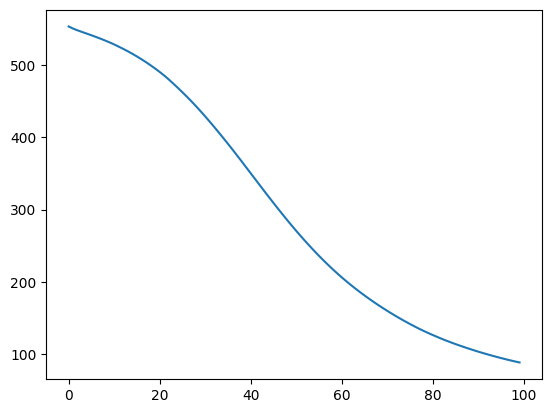

In [6]:
plt.plot(costs)

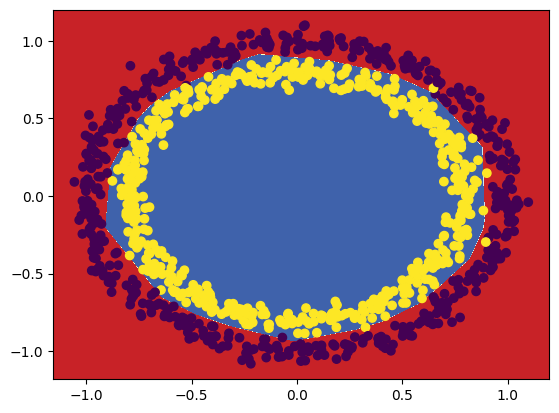

In [7]:
x_min , x_max = DATA[:,0].min() - 0.1 , DATA[:,0].max() + 0.1
y_min , y_max = DATA[:,1].min() - 0.1 , DATA[:,1].max() + 0.1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,1000),np.linspace(y_min,y_max,1000))
np.linspace(y_min,y_max,100)
x_in = np.c_[xx.ravel(),yy.ravel()]
y_pred = (model.predict(x_in)[:,0] != 1).astype(int).reshape(xx.shape)

plt.contourf(xx,yy,y_pred,cmap= plt.cm.RdYlBu)
plt.scatter(DATA[:,0],DATA[:,1],c = LABELS)

In [8]:
accuracy = model.evaluate(model.predict(x_test),y_test)
print(f"accuracy : {accuracy}%")

accuracy : 99.5%
